<a href="https://colab.research.google.com/github/thedatascientistichub/FIAP--Pos-Data-Analytics---Fase-1/blob/main/Fase%201%20-%20Tech%20Challenge%20-%20Data%20Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# *Fase 1* - **Tech Challenge** - *Data Analytics*

## **DESCRIÇÃO:**
### O *Tech Challenge* é o projeto da fase que engloba conhecimentos obtidos em todas as disciplinas.

## **O PROBLEMA:**
### Você vai atuar como expert em Data Analytics em uma empresa que exporta vinhos do Brasil para o Mundo todo. Sua área é recém-criada dentro da empresa e você será responsável pelos relatórios iniciais que serão apresentados em uma reunião de investidores e acionistas, com o objetivo de gerar insights sobre a exportação de vinhos e correlacionar dados provenientes de fatores externos, como:

#### 1. Dados climáticos;
#### 2. Dados demográficos;
#### 3. Dados econômicos;
#### 4. Dados de avaliação de vinhos.

## **DEMANDA:**

### O head de dados solicitou que fosse criada uma tabela com as seguintes informações:

#### a. País de origem (Brasil);
#### b. País de destino;
#### c. Quantidade em litros de vinho exportado (utilize 1kg = 1l);
#### d. Valor em US$ (dólar)

### O Objetivo é dizer o montante de venda de exportação nos últimos 15 anos, separando a análise por país e trazendo quais as prospecções futuras e possíveis ações para uma melhoria nas exportações.


# **Importação de bibliotecas**

In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker


# **Importação das bases**

## **Dados de Produção:**

In [31]:
# Dataset com dados de produção de vinhos (1970 - 2022)
df_producao = pd.read_csv("https://raw.githubusercontent.com/thedatascientistichub/FIAP--Pos-Data-Analytics---Fase-1/main/Producao.csv", delimiter=";")

## **Dados de Exportação:**

In [32]:
# Dataset com dados de exportação de vinhos (1970 - 2022)
df_exportacao = pd.read_csv("https://raw.githubusercontent.com/thedatascientistichub/FIAP--Pos-Data-Analytics---Fase-1/main/ExpVinho.csv", delimiter=";")

# Análise exploratória - **Produção de Vinho** (1970 - 2022)

In [33]:
# Visualizando o Dataframe
df_producao.head()

,id,produto,1970,1971,1972,1973,1974,1975,1976,1977,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,1,VINHO DE MESA,217208604,154264651,146953297,116710345,193875345,177401209,144565438,195359778,...,196904222,196173123,210308560,86319015,255015187,218375636,144629737,124200414,173899995,195031611
1,2,Tinto,174224052,121133369,118180926,88589019,146544484,144274134,118360170,154801826,...,163111797,157776363,169811472,75279191,1365957,188270142,121045115,103916391,146075996,162844214
2,3,Branco,748400,1160500,1812367,243900,4138768,1441507,1871473,4954387,...,32066403,37438069,39557250,10727099,217527985,29229970,22032828,19568734,26432799,30198430
3,4,Rosado,42236152,31970782,26960004,27877426,43192093,31685568,24333795,35603565,...,1726022,958691,939838,312725,36121245,875524,1551794,715289,1391200,1988968
4,5,VINHO FINO DE MESA (VINÍFERA),23899346,23586062,21078771,12368410,31644124,39424590,34500590,41264971,...,45782530,38464314,37148982,18070626,44537870,38707220,37615422,32516686,43474998,47511796


In [34]:
df_producao = df_producao.iloc[:8, 1:]
df_producao

,produto,1970,1971,1972,1973,1974,1975,1976,1977,1978,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,VINHO DE MESA,217208604,154264651,146953297,116710345,193875345,177401209,144565438,195359778,200053669,...,196904222,196173123,210308560,86319015,255015187,218375636,144629737,124200414,173899995,195031611
1,Tinto,174224052,121133369,118180926,88589019,146544484,144274134,118360170,154801826,162917363,...,163111797,157776363,169811472,75279191,1365957,188270142,121045115,103916391,146075996,162844214
2,Branco,748400,1160500,1812367,243900,4138768,1441507,1871473,4954387,5079748,...,32066403,37438069,39557250,10727099,217527985,29229970,22032828,19568734,26432799,30198430
3,Rosado,42236152,31970782,26960004,27877426,43192093,31685568,24333795,35603565,32056558,...,1726022,958691,939838,312725,36121245,875524,1551794,715289,1391200,1988968
4,VINHO FINO DE MESA (VINÍFERA),23899346,23586062,21078771,12368410,31644124,39424590,34500590,41264971,36750933,...,45782530,38464314,37148982,18070626,44537870,38707220,37615422,32516686,43474998,47511796
5,Tinto,7591557,7265666,6782837,3419625,10047658,14731106,12405154,16131758,15000671,...,23156458,17208996,16745896,8774847,21442212,19118254,17389377,15451883,20433249,24417918
6,Branco,15562889,15655709,13289304,7930070,18927471,21933695,19874659,20409231,17640081,...,21906349,20054804,19561966,8705066,21928400,18297257,18193055,15487915,20867999,20896613
7,Rosado,744900,664687,1006630,1018715,2668995,2759789,2220777,4723982,4110181,...,719723,1200514,841120,590713,1167258,1291709,2032990,1576888,2173750,2197265


In [35]:
# variável ano definida pelas colunas da df_producao
ano = df_producao.columns

# Aplicação do .melt para definição de Ano, Quantidade (litros) e Produto
df_producao = pd.melt(df_producao, id_vars=['produto'], var_name='Ano', value_name='Quantidade (litros)')

# produto renomeado para Tipo
df_producao.rename(columns={'produto': 'Tipo'}, inplace=True)

df_producao.head(8)

,Tipo,Ano,Quantidade (litros)
0,VINHO DE MESA,1970,217208604
1,Tinto,1970,174224052
2,Branco,1970,748400
3,Rosado,1970,42236152
4,VINHO FINO DE MESA (VINÍFERA),1970,23899346
5,Tinto,1970,7591557
6,Branco,1970,15562889
7,Rosado,1970,744900


In [36]:
# Lista de valores que devem ser excluídos da coluna Tipo
valores_a_excluir = ["VINHO DE MESA", "VINHO FINO DE MESA (VINÍFERA)"]

# Exclusão
df_producao = df_producao[~df_producao["Tipo"].isin(valores_a_excluir)]

df_producao.head(8)

,Tipo,Ano,Quantidade (litros)
1,Tinto,1970,174224052
2,Branco,1970,748400
3,Rosado,1970,42236152
5,Tinto,1970,7591557
6,Branco,1970,15562889
7,Rosado,1970,744900
9,Tinto,1971,121133369
10,Branco,1971,1160500


In [37]:
# Criação de agrupamento para os Tipos de vinhos
agrupamento = [
    "VINHO DE MESA", "VINHO DE MESA", "VINHO DE MESA", "VINHO FINO DE MESA (VINÍFERA)", "VINHO FINO DE MESA (VINÍFERA)",
    "VINHO FINO DE MESA (VINÍFERA)"
    ]

# Número de vezes que a sequência deve ser repetida
num_repeticoes = len(df_producao) // len(agrupamento)

# Número de vezes necessário para preencher todas as linhas
df_producao["Produto"] = agrupamento * num_repeticoes

# Setando a coluna Agrupamentos como index
df_producao = df_producao.set_index('Produto')

df_producao

,Tipo,Ano,Quantidade (litros)
Produto,,,
VINHO DE MESA,Tinto,1970,174224052
VINHO DE MESA,Branco,1970,748400
VINHO DE MESA,Rosado,1970,42236152
VINHO FINO DE MESA (VINÍFERA),Tinto,1970,7591557
VINHO FINO DE MESA (VINÍFERA),Branco,1970,15562889
...,...,...,...
VINHO DE MESA,Branco,2022,30198430
VINHO DE MESA,Rosado,2022,1988968
VINHO FINO DE MESA (VINÍFERA),Tinto,2022,24417918


In [38]:
# Verificando os tipos de cada coluna para realizar filtragem da produção dos últimos 15 anos
df_producao.dtypes

Tipo                   object
Ano                    object
Quantidade (litros)     int64
dtype: object

In [39]:
# Convertendo a coluna "Ano" para o tipo inteiro
df_producao['Ano'] = df_producao['Ano'].astype(int)

# Verificando alteração
df_producao.dtypes

Tipo                   object
Ano                     int64
Quantidade (litros)     int64
dtype: object

In [40]:
# Filtrando últimos 15 anos
df_producao = df_producao.loc[df_producao['Ano'] >= df_producao["Ano"].max()-14]
df_producao

,Tipo,Ano,Quantidade (litros)
Produto,,,
VINHO DE MESA,Tinto,2008,241057928
VINHO DE MESA,Branco,2008,42942053
VINHO DE MESA,Rosado,2008,3506830
VINHO FINO DE MESA (VINÍFERA),Tinto,2008,27583032
VINHO FINO DE MESA (VINÍFERA),Branco,2008,18812571
...,...,...,...
VINHO DE MESA,Branco,2022,30198430
VINHO DE MESA,Rosado,2022,1988968
VINHO FINO DE MESA (VINÍFERA),Tinto,2022,24417918


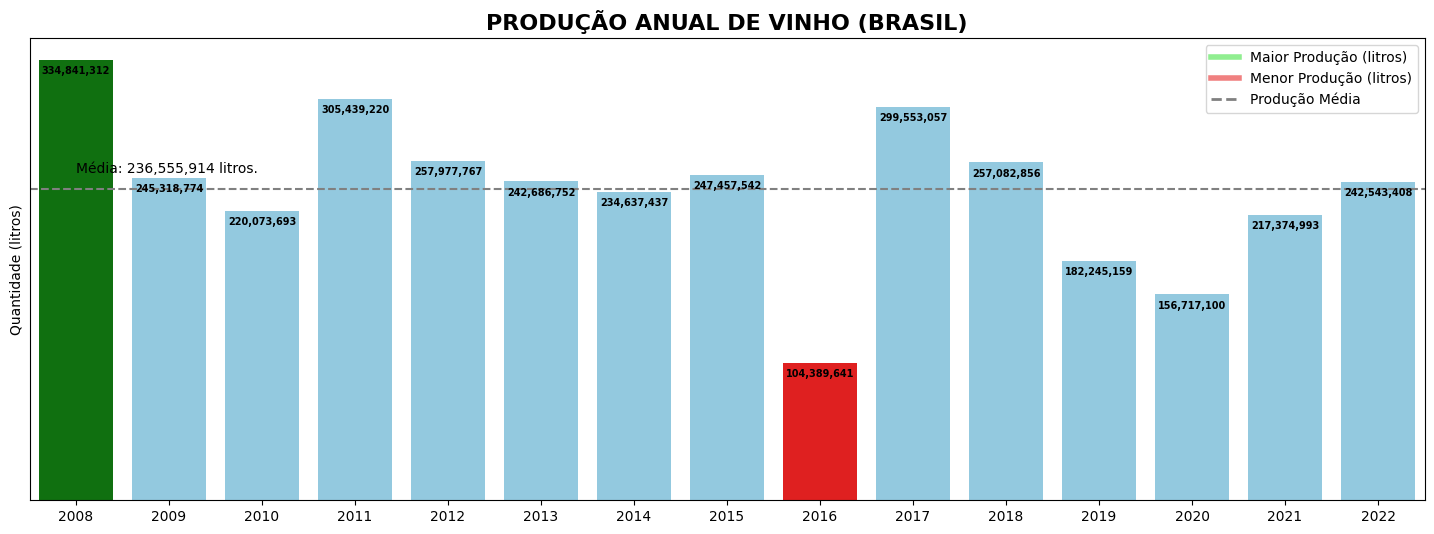

In [47]:
## Agrupando o DataFrame por ano e somando a quantidade para cada ano
producao_anual_nacional = df_producao.groupby('Ano')['Quantidade (litros)'].sum().reset_index()

# Calculando a média
media = producao_anual_nacional['Quantidade (litros)'].mean()

# Formatar a média com separadores de milhar
media_formatada = '{:,.0f}'.format(media)

# Crie uma lista de cores para destacar as barras
indice_min = producao_anual_nacional['Quantidade (litros)'].idxmin()
indice_max = producao_anual_nacional['Quantidade (litros)'].idxmax()
cores = ['red' if i == indice_min else 'green' if i == indice_max else 'skyblue' for i in range(len(producao_anual_nacional))]

# Criando o gráfico de barras
plt.figure(figsize=(18, 6))
ax = sns.barplot(data=producao_anual_nacional, x='Ano', y='Quantidade (litros)', palette=cores)

# Adicionando a linha cinza da média
plt.axhline(media, color='gray', linestyle='--')
plt.text(0, media + 10000000, f'Média: {media_formatada} litros.', va='bottom', ha='left', color='black')

# Definindo título do gráfico
plt.title('PRODUÇÃO ANUAL DE VINHO (BRASIL)', fontsize=16, fontweight='bold')

# Definindo texto dos eixos y e x
plt.ylabel('Quantidade (litros)')
plt.xlabel('')

# Removendo linhas
ax.yaxis.grid(False)

# Adicionando rótulos de Quantidade (litros) nas barras na parte interna
for p in ax.patches:
    value = int(p.get_height())
    formatted_value = '{:,.0f}'.format(value)
    ax.annotate(f'{formatted_value}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=7, fontweight='bold', color='black', xytext=(0, -8),
                textcoords='offset points')

# Criando a legenda
legend_labels = ['Maior Produção (litros)', 'Menor Produção (litros)']
legend_handles = [plt.Line2D([0], [0], color='lightgreen', lw=4),
                  plt.Line2D([0], [0], color='lightcoral', lw=4),
                  plt.Line2D([0], [0], color='gray', linestyle='--', lw=2)]
ax.legend(legend_handles, legend_labels + [f'Produção Média'], loc='upper right')

# Configurando o eixo y para mostrar apenas o texto
ax.set_yticks([])

# Exibindo o gráfico
plt.show()

## No período analisado, que compreende os anos de **2008 a 2022**, é notável que o ano de **2008 se destacou com a maior produção anual de vinho**, enquanto **2016 marcou o período com a menor produção registrada**. Essas variações na produção ao longo desses anos podem ser influenciadas por diversos fatores, como condições climáticas, práticas agrícolas e tendências de mercado. Essas informações são valiosas para entender as dinâmicas da indústria vinícola e podem auxiliar na tomada de decisões estratégicas para produtores e comerciantes de vinho.

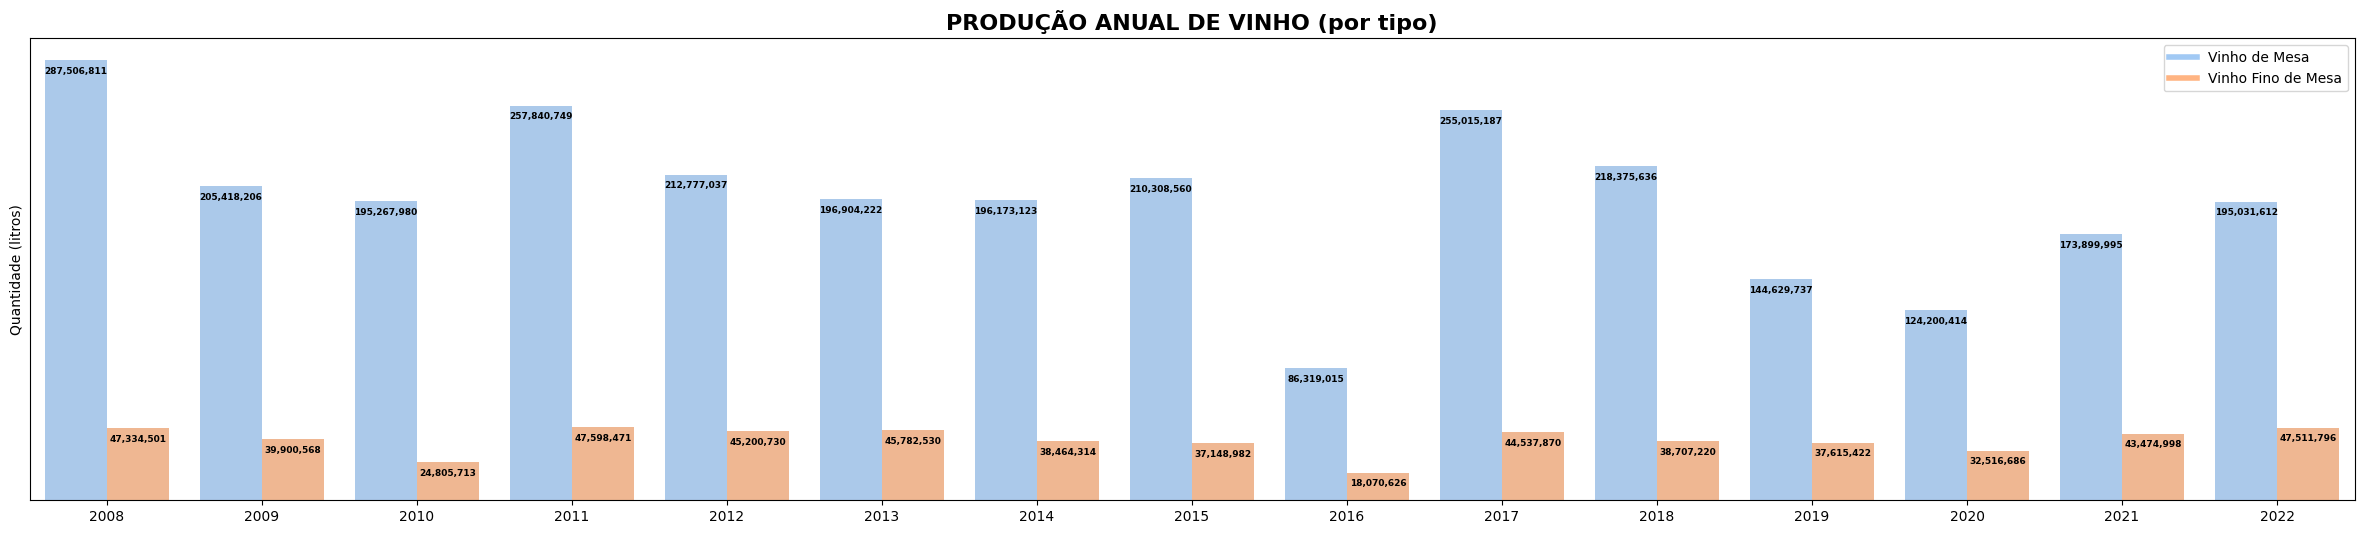

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Agrupe o DataFrame por ano e some a quantidade para cada ano, separado por produto
producao_anual_nacional_tipo = df_producao.groupby(['Ano', 'Produto'])['Quantidade (litros)'].sum().reset_index()

# Crie uma paleta de cores suaves
palette = sns.color_palette("pastel")

# Crie o gráfico de barras empilhadas com a paleta de cores personalizada
plt.figure(figsize=(30, 6))
ax = sns.barplot(data=producao_anual_nacional_tipo, x='Ano', y='Quantidade (litros)', hue='Produto', palette=palette)

# Definindo título do gráfico
plt.title('PRODUÇÃO ANUAL DE VINHO (por tipo)', fontsize=16, fontweight='bold')

# Definindo texto dos eixos y e x
plt.ylabel('Quantidade (litros)')
plt.xlabel('')

# Removendo linhas
ax.yaxis.grid(False)

# Adicionando rótulos de Quantidade (litros) nas barras na parte interna
for p in ax.patches:
    ax.annotate(f'{int(p.get_height()):,}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=6.5, fontweight='bold', color='black', xytext=(0, -8),
                textcoords='offset points')

# Configurando o eixo y para mostrar apenas o texto
ax.set_yticks([])

# Criando a legenda
legend_labels = ['Vinho de Mesa', 'Vinho Fino de Mesa']
legend_handles = [plt.Line2D([0], [0], color=palette[0], lw=4),
                  plt.Line2D([0], [0], color=palette[1], lw=4)]
ax.legend(legend_handles, legend_labels, loc='upper right')

# Exibe o gráfico
plt.show()


In [46]:
vm_prod = df_filtrado[df_filtrado.index == 'Vinho de mesa']

NameError: ignored

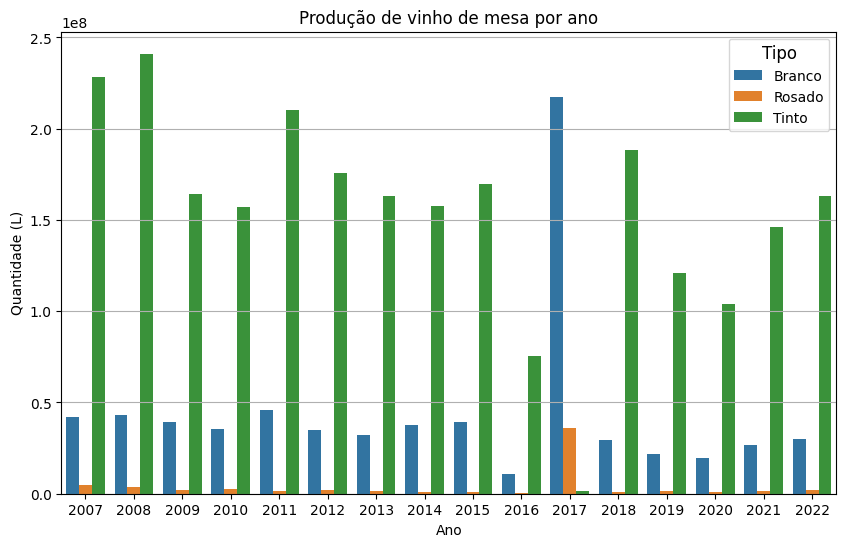

In [ ]:
# Configure o estilo do Seaborn (opcional)
#sns.set(style="whitegrid")

# Agrupe o DataFrame por ano e some a quantidade para cada ano, separado por tipo
quantidade_por_ano_prod_vm = vm_prod.groupby(['Ano', 'Tipo'])['Qtd'].sum().reset_index()

# Crie o gráfico de barras empilhadas
plt.figure(figsize=(10, 6))
sns.barplot(data=quantidade_por_ano_prod_vm, x='Ano', y='Qtd', hue='Tipo')

# Configurações do gráfico
plt.title('Produção de vinho de mesa por ano')
plt.xlabel('Ano')
plt.ylabel('Quantidade (L)')

# Exibe a legenda
plt.legend(title='Tipo', title_fontsize='12')
plt.grid(axis='y')

# Exibe o gráfico
plt.show()

# Análise exploratória - **Exportação de Vinho** (1970 - 2022)

In [ ]:
df_exp_vinho.head()

,Id,País,1970,1970.1,1971,1971.1,1972,1972.1,1973,1973.1,...,2018,2018.1,2019,2019.1,2020,2020.1,2021,2021.1,2022,2022.1
0,1,Afeganistão,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,11,46,0,0
1,2,África do Sul,0,0,0,0,0,0,0,0,...,0,0,26,95,4,21,0,0,0,0
2,3,"Alemanha, República Democrática",0,0,0,0,4168,2630,12000,8250,...,10794,45382,3660,25467,6261,32605,2698,6741,7630,45367
3,4,Angola,0,0,0,0,0,0,0,0,...,477,709,345,1065,0,0,0,0,4068,4761
4,5,Anguilla,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_exp_vinho= df_exp_vinho.drop(columns=["Id"], axis=0)



In [ ]:
df_exp_vinho= df_exp_vinho.set_index("País")


In [ ]:
df_exp_vinho.head()

,1970,1970.1,1971,1971.1,1972,1972.1,1973,1973.1,1974,1974.1,...,2018,2018.1,2019,2019.1,2020,2020.1,2021,2021.1,2022,2022.1
País,,,,,,,,,,,,,,,,,,,,,
Afeganistão,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,11,46,0,0
África do Sul,0,0,0,0,0,0,0,0,0,0,...,0,0,26,95,4,21,0,0,0,0
"Alemanha, República Democrática",0,0,0,0,4168,2630,12000,8250,0,0,...,10794,45382,3660,25467,6261,32605,2698,6741,7630,45367
Angola,0,0,0,0,0,0,0,0,0,0,...,477,709,345,1065,0,0,0,0,4068,4761
Anguilla,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_exp_vinho.columns

Index(['1970', '1970.1', '1971', '1971.1', '1972', '1972.1', '1973', '1973.1',
       '1974', '1974.1',
       ...
       '2018', '2018.1', '2019', '2019.1', '2020', '2020.1', '2021', '2021.1',
       '2022', '2022.1'],
      dtype='object', length=106)

In [ ]:
colunas_com_ponto = df_exp_vinho.filter(like='.', axis=1)

colunas_com_ponto.head()

,1970.1,1971.1,1972.1,1973.1,1974.1,1975.1,1976.1,1977.1,1978.1,1979.1,...,2013.1,2014.1,2015.1,2016.1,2017.1,2018.1,2019.1,2020.1,2021.1,2022.1
País,,,,,,,,,,,,,,,,,,,,,
Afeganistão,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,46,0
África do Sul,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,95,21,0,0
"Alemanha, República Democrática",0,0,2630,8250,0,0,0,0,0,6500,...,265978,761653,44780,68109,87702,45382,25467,32605,6741,45367
Angola,0,0,0,0,0,0,0,0,0,2387643,...,9300,23124,17089,35390,61680,709,1065,0,0,4761
Anguilla,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
exp_valor= pd.melt(colunas_com_ponto ,value_name = "Valor", var_name = "Ano"  , ignore_index=False)
exp_valor

,Ano,Valor
País,,
Afeganistão,1970.1,0
África do Sul,1970.1,0
"Alemanha, República Democrática",1970.1,0
Angola,1970.1,0
Anguilla,1970.1,0
...,...,...
Tuvalu,2022.1,0
Uruguai,2022.1,997367
Vanuatu,2022.1,0


In [ ]:
exp_valor["Ano"] = exp_valor["Ano"].str.replace("\.1", "")
exp_valor = exp_valor.reset_index()
exp_valor

<ipython-input-2168-088fd62462d4>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  exp_valor["Ano"] = exp_valor["Ano"].str.replace("\.1", "")


,País,Ano,Valor
0,Afeganistão,1970,0
1,África do Sul,1970,0
2,"Alemanha, República Democrática",1970,0
3,Angola,1970,0
4,Anguilla,1970,0
...,...,...,...
6779,Tuvalu,2022,0
6780,Uruguai,2022,997367
6781,Vanuatu,2022,0
6782,Venezuela,2022,32351


In [ ]:
#colunas_sem_ponto = df_exp_vinho.filter(like= ".", axis=1)

In [ ]:
colunas_com_4_digitos = [coluna for coluna in df_exp_vinho.columns if coluna.isdigit() and len(coluna) == 4]
colunas_com_4_digitos = colunas_com_4_digitos
colunas_com_4_digitos

['1970',
 '1971',
 '1972',
 '1973',
 '1974',
 '1975',
 '1976',
 '1977',
 '1978',
 '1979',
 '1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015',
 '2016',
 '2017',
 '2018',
 '2019',
 '2020',
 '2021',
 '2022']

In [ ]:
colunas_sem_ponto = df_exp_vinho[colunas_com_4_digitos]

In [ ]:
exp_qtd= pd.melt(colunas_sem_ponto ,value_name = "Qtd", var_name = "Ano", ignore_index=False)
exp_qtd= exp_qtd.reset_index()
exp_qtd

,País,Ano,Qtd
0,Afeganistão,1970,0
1,África do Sul,1970,0
2,"Alemanha, República Democrática",1970,0
3,Angola,1970,0
4,Anguilla,1970,0
...,...,...,...
6779,Tuvalu,2022,0
6780,Uruguai,2022,637117
6781,Vanuatu,2022,0
6782,Venezuela,2022,23220


In [ ]:

exportacao = exp_valor.merge(exp_qtd, left_on= ["País", "Ano"],right_on=["País", "Ano"])
exportacao =exportacao.set_index("País")
exportacao

,Ano,Valor,Qtd
País,,,
Afeganistão,1970,0,0
África do Sul,1970,0,0
"Alemanha, República Democrática",1970,0,0
Angola,1970,0,0
Anguilla,1970,0,0
...,...,...,...
Tuvalu,2022,0,0
Uruguai,2022,997367,637117
Vanuatu,2022,0,0


In [ ]:
exportacao["Ano"]=exportacao["Ano"].astype("int64")
exportacao["Qtd"]=exportacao["Qtd"].astype("int64")

exportacao  = exportacao.loc[exportacao['Ano'] >= exportacao["Ano"].max()-15]
exportacao

,Ano,Valor,Qtd
País,,,
Afeganistão,2007,0,0
África do Sul,2007,0,0
"Alemanha, República Democrática",2007,238052,119512
Angola,2007,49753,25931
Anguilla,2007,0,0
...,...,...,...
Tuvalu,2022,0,0
Uruguai,2022,997367,637117
Vanuatu,2022,0,0


In [ ]:
exportacao_2022 = exportacao[exportacao['Ano'] == 2022]
exportacao_2022 = exportacao_2022[['Ano', 'Qtd', 'Valor']]
exportacao_2022 = exportacao_2022.sort_values(by='Qtd', ascending=False)
exportacao_2022

,Ano,Qtd,Valor
País,,,
Paraguai,2022,5076670,7156293
Uruguai,2022,637117,997367
Haiti,2022,553503,741014
Estados Unidos,2022,220373,447893
China,2022,105395,404647
...,...,...,...
Costa Rica,2022,0,0
Nova Caledônia,2022,0,0
Guine Equatorial,2022,0,0


In [ ]:
exportacao = exportacao[['Ano', 'Qtd', 'Valor']]
exportacao = exportacao.sort_values(by='Qtd', ascending=False)
exportacao.head(11)

,Ano,Qtd,Valor
País,,,
Rússia,2009,21912914,5732280
Paraguai,2021,6522527,7192362
Rússia,2008,6207658,2352768
Rússia,2013,5893291,14795694
Paraguai,2022,5076670,7156293
Rússia,2012,4528176,2103968
Paraguai,2020,3299013,3869243
Paraguai,2018,3234168,5494321
Paraguai,2019,2419537,3826587


In [ ]:
paises_relevantes = (exportacao[exportacao['Qtd'] > 1000])
paises_relevantes

,Ano,Qtd,Valor
País,,,
Rússia,2009,21912914,5732280
Paraguai,2021,6522527,7192362
Rússia,2008,6207658,2352768
Rússia,2013,5893291,14795694
Paraguai,2022,5076670,7156293
...,...,...,...
Argentina,2020,1015,4176
Austrália,2009,1014,9195
Austrália,2020,1013,3413


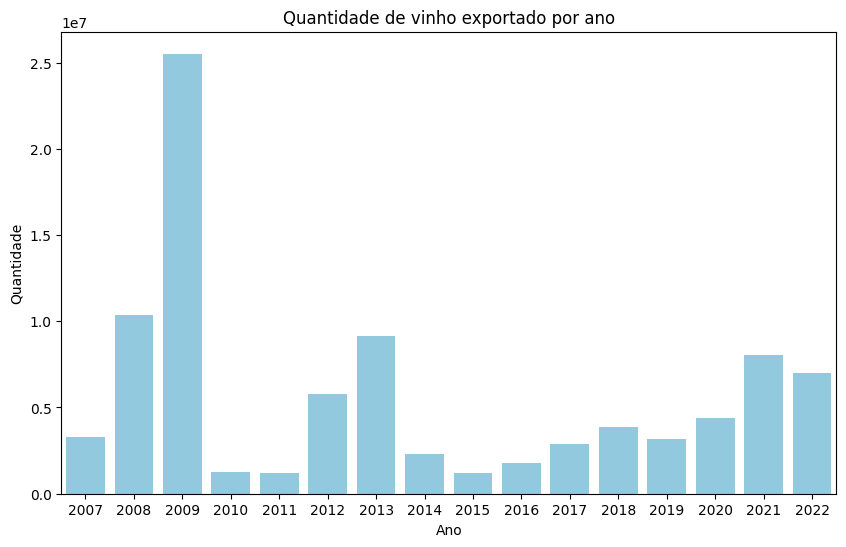

In [ ]:
# Configure o estilo do Seaborn
#sns.set(style="whitegrid")

# Agrupe o DataFrame por ano e some a quantidade para cada ano
quantidade_por_ano = exportacao.groupby('Ano')['Qtd'].sum().reset_index()

# Crie o gráfico de barras com o Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(data=quantidade_por_ano, x='Ano', y='Qtd', color='skyblue')

# Configurações do gráfico
plt.title('Quantidade de vinho exportado por ano')
plt.xlabel('Ano')
plt.ylabel('Quantidade')

# Exibe o gráfico
plt.show()

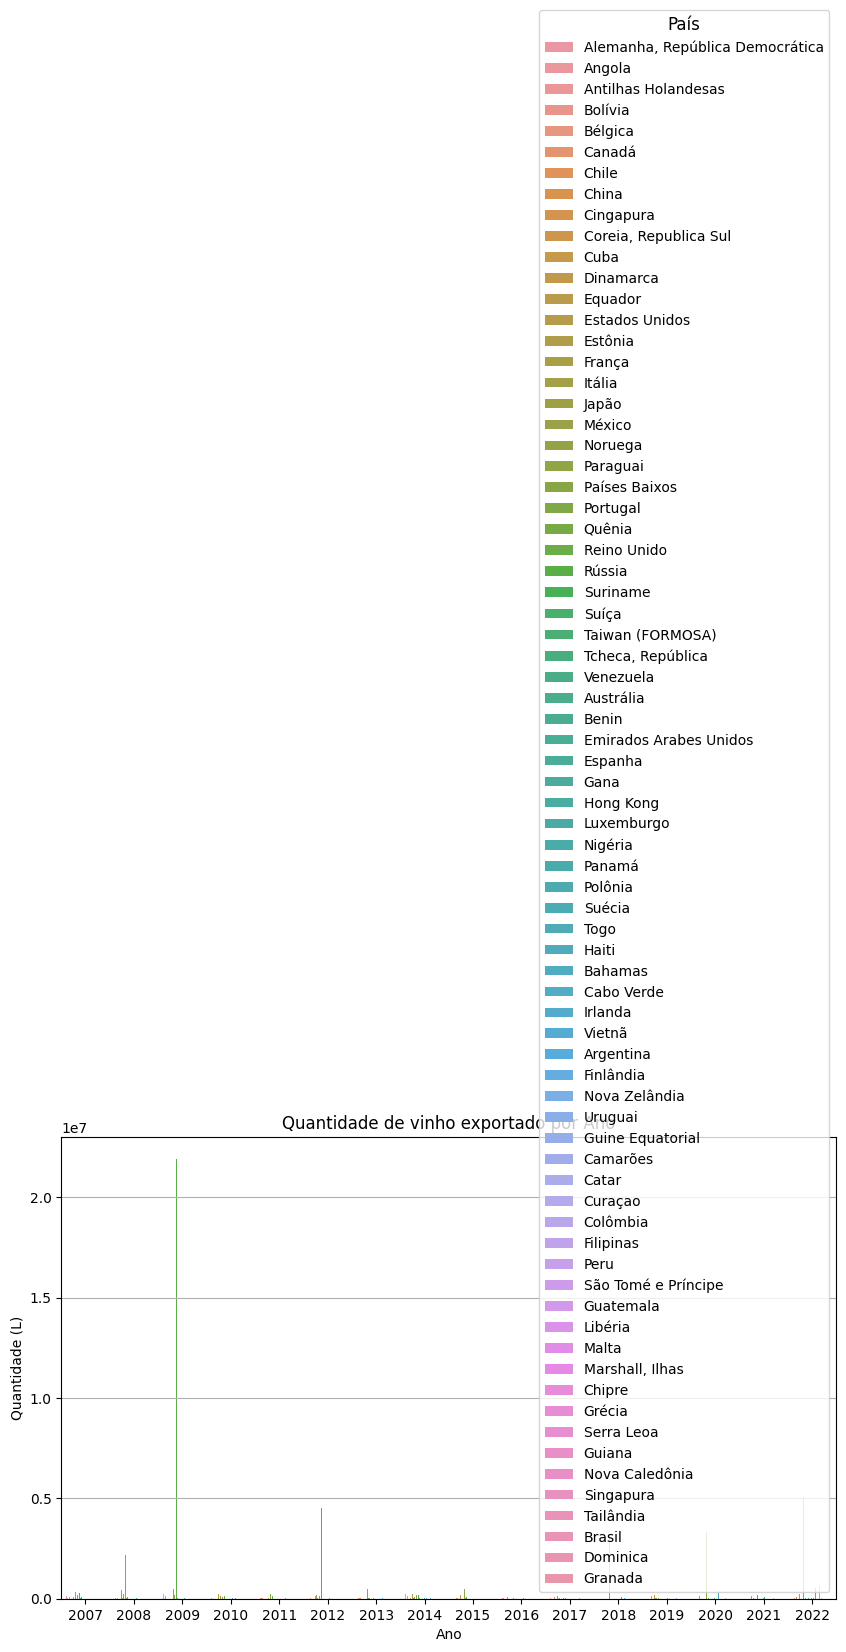

In [ ]:
# Configure o estilo do Seaborn (opcional)
#sns.set(style="whitegrid")

# Agrupe o DataFrame por ano e some a quantidade para cada ano, separado por país
quantidade_por_ano_r = paises_relevantes.groupby(['Ano', 'País'])['Qtd'].sum().reset_index()

# Crie o gráfico de barras empilhadas
plt.figure(figsize=(10, 6))
sns.barplot(data=quantidade_por_ano_r, x='Ano', y='Qtd', hue='País')

# Configurações do gráfico
plt.title('Quantidade de vinho exportado por Ano')
plt.xlabel('Ano')
plt.ylabel('Quantidade (L)')

# Exibe a legenda
plt.legend(title='País', title_fontsize='12')
plt.grid(axis='y')

# Exibe o gráfico
plt.show()
